In [3]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import datetime
import calendar
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns

In [4]:
df = pd.read_csv('raw_ckd.csv')

In [5]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

Finding co-relation between columns.

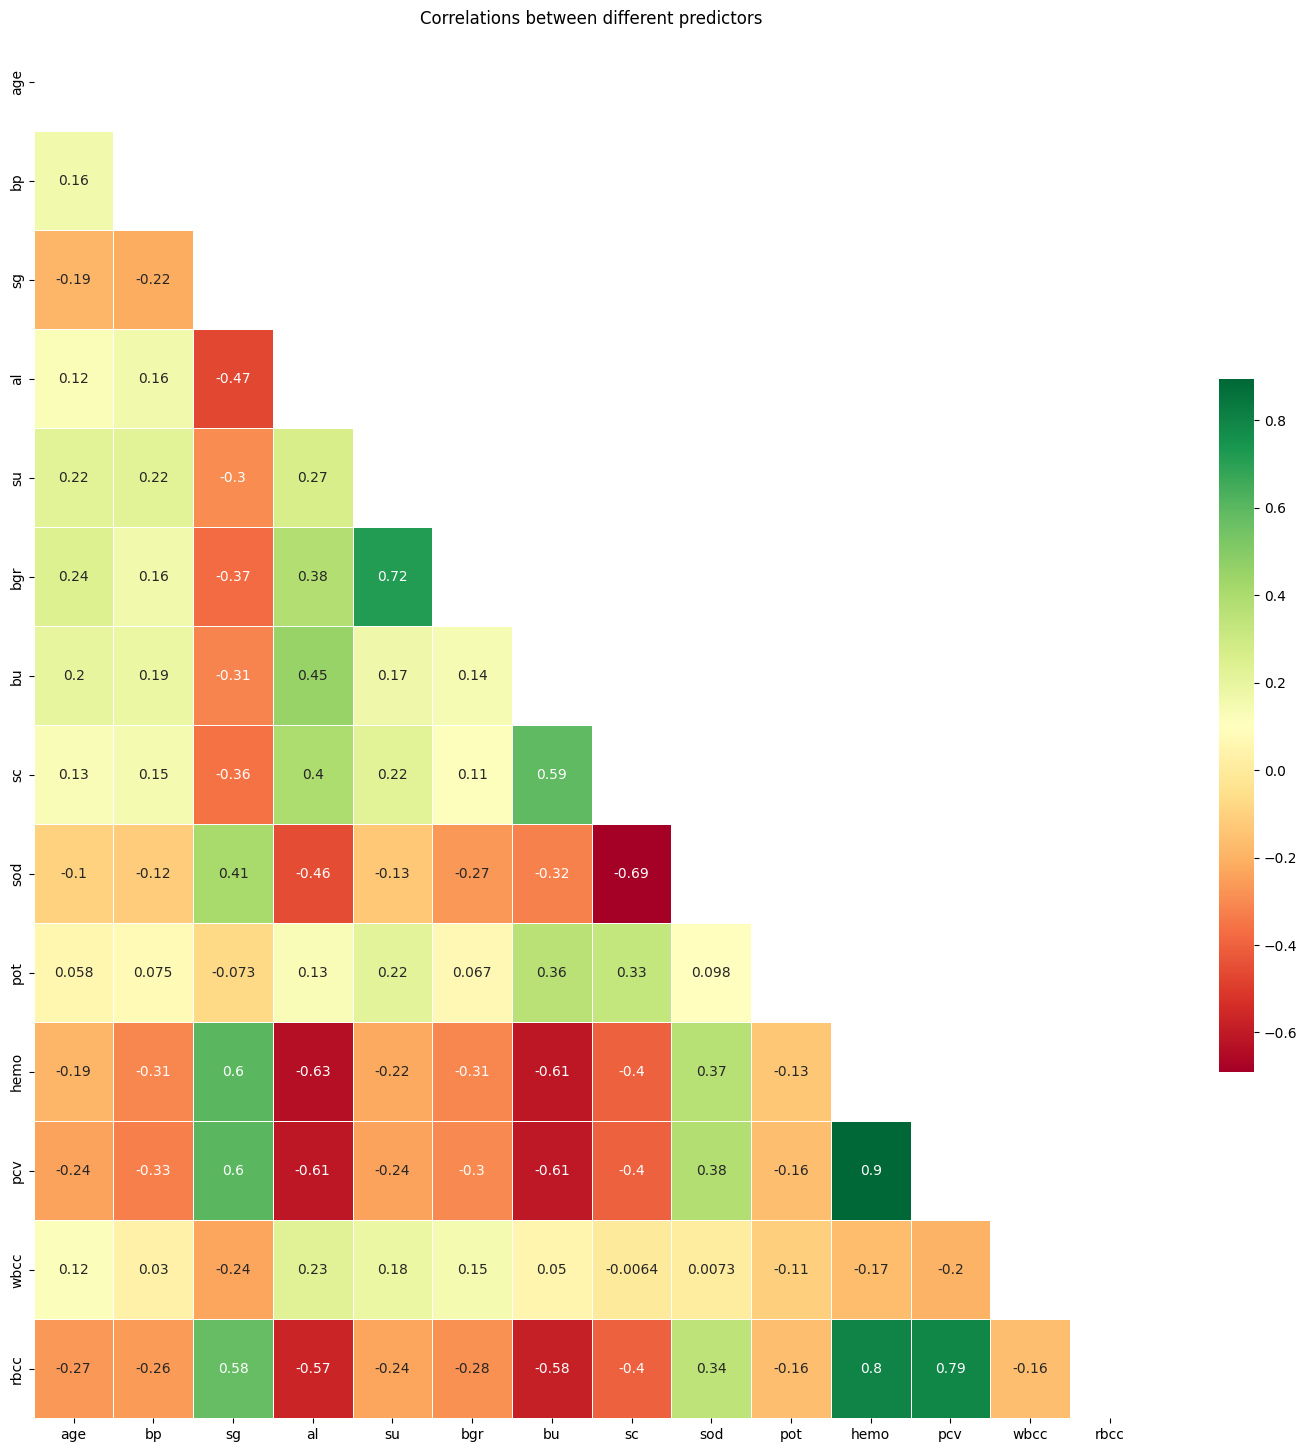

In [6]:
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
corr_df = df[numerical_features].corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corr_df, dtype=bool) # Changed np.bool to bool
mask[np.triu_indices_from(mask)] = True

# Create the heatmap
f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(corr_df, mask=mask, annot=True, linewidths=.5, cmap='RdYlGn', cbar_kws={"shrink": .5});
#  vmax=.3, center=0,square=True,
plt.title('Correlations between different predictors')
plt.show()


We can see from the heat map that 'hemo' , 'pcv' are columns with lowest numerical value and 'bu' have highest numerical value in columns in our datset.

In [7]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


We have lots of data in our dataset which have boolean values. Let's plot graph for every other column showing their count

# Red Blood Cells

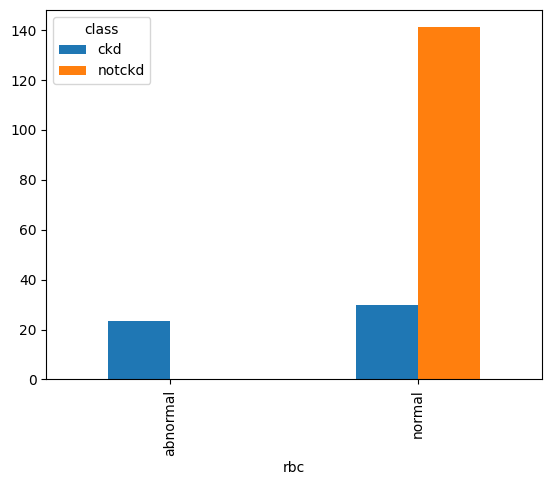

In [8]:
d = df.groupby(['rbc', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

Patients with abnormal(0) red blood cell will suffer from kidney disease. There are chances
of having kidney disease even if you have normal(1) red blood cell count.

# Packed Cell

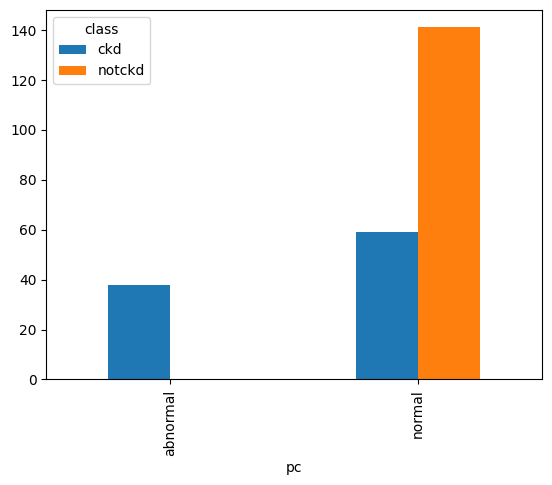

In [9]:
d = df.groupby(['pc', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

Patients with abnormal(0) packed cell are prone to kidney disease. There are chances of having kidney disease even if you have normal(1) packed cell count.

# Prothombin Complex Concentrate

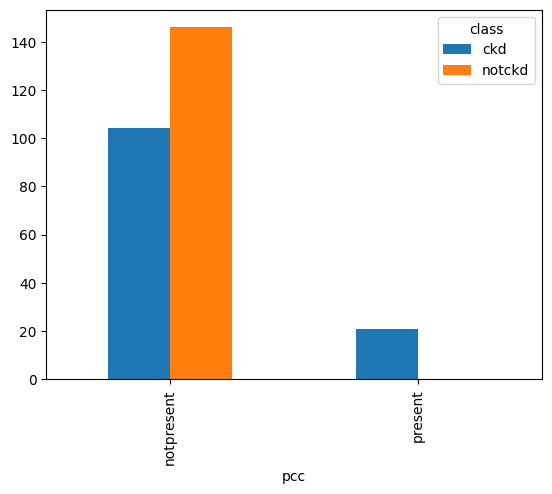

In [10]:
d = df.groupby(['pcc', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who lack Prothombin Complex Concentrate(0) have less chances of gettin kidney disease and people who have Prothombin Complex Concentrate(1) have high chances of getting kidney disease. But in our dataset, there are more entries of people not having Prothombin Complex Concentrate

# Barium

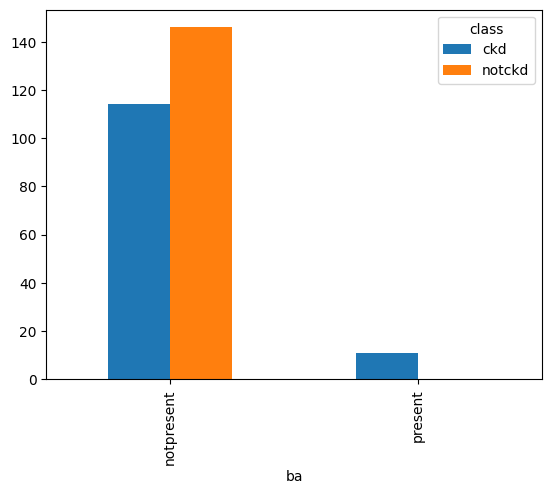

In [11]:
d = df.groupby(['ba', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who lack barium(0) have less chances of gettin kidney disease and people who have barium(1) have high chances of getting kidney disease. But in our dataset, there are more entries of people not having barium

# Hypertension

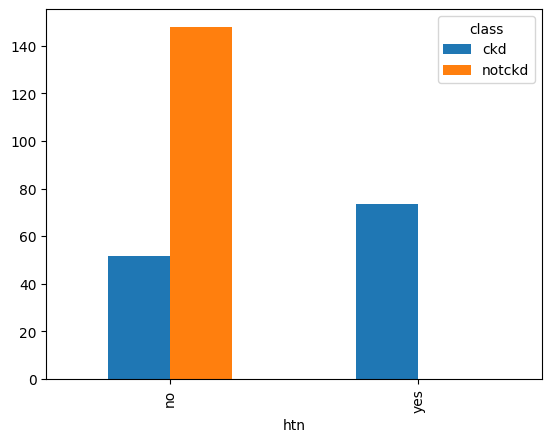

In [12]:
d = df.groupby(['htn', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who have hypertension, they will have kidney disease. People who don't have hypertension have chances of having kidney disease.

# Diabetes Mellitus

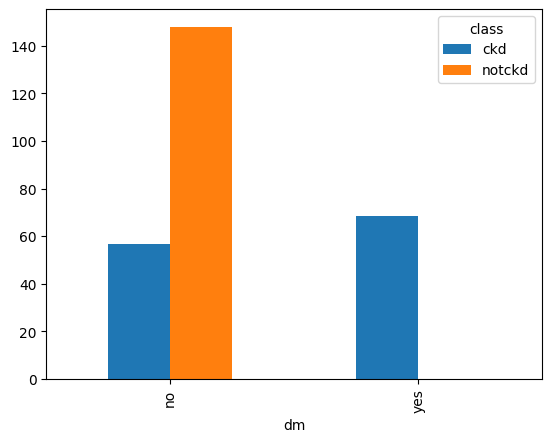

In [13]:
d = df.groupby(['dm', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who lack diabetes mellitus have less chances of getting kidney disease. People who have diabetes mellitus have very hugh chances of getting kidney disease.

# Coronary Artery Disease

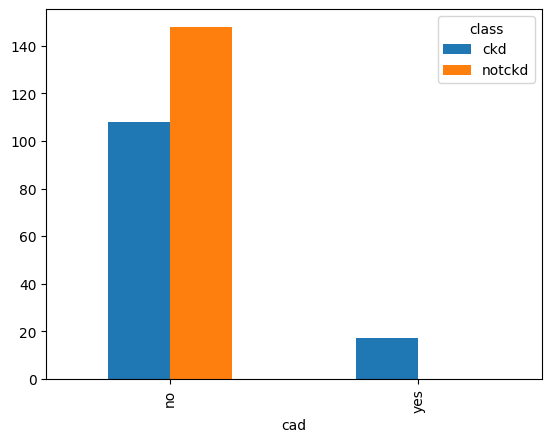

In [14]:
d = df.groupby(['cad', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who have coronary artery disease have very high chances of getting kidney disease. People who don't have coronary artery disease have less chance of getting kidney disease.

# Appetite

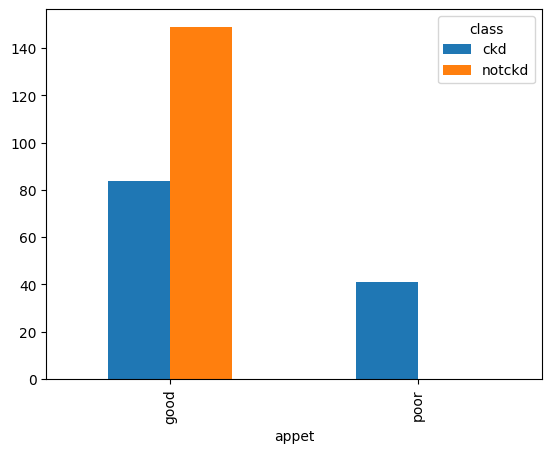

In [15]:
d = df.groupby(['appet', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People with poor appetite(0) have more chances of getting kidney disease but from our dataset, we came to understand that people having good appetite can also have kidney disease as we have more entries of this type of data

# Pulmonary Embolism

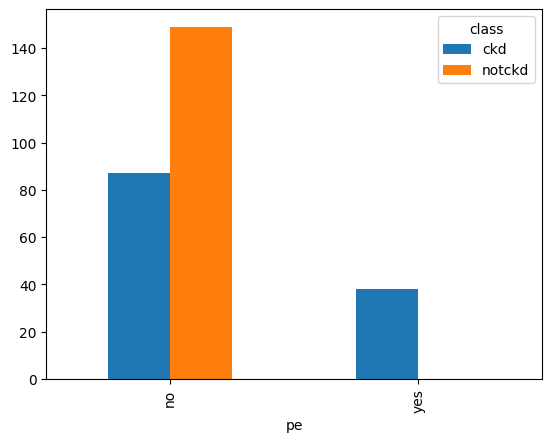

In [16]:
d = df.groupby(['pe', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People with pulmonary disease(1) have very high chance of getting kidney disease but from our dataset, we understood that people without pulmonary embolism(0) can also have kidney desease as we have higher entries of this type of data.

# Audible Nasal Emission

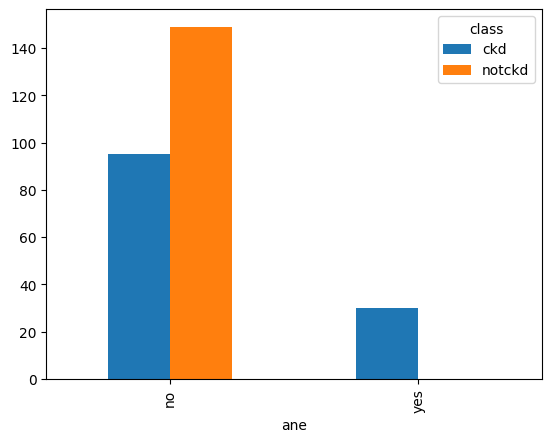

In [17]:
d = df.groupby(['ane', 'class']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People with audible nasal emission(1) have very high chance of getting kidney disease but from our dataset, we understood that people without audible nasal emission(0) can also have kidney desease as we have higher entries of this type of data.

# Disease detected or not

<Axes: xlabel='class', ylabel='count'>

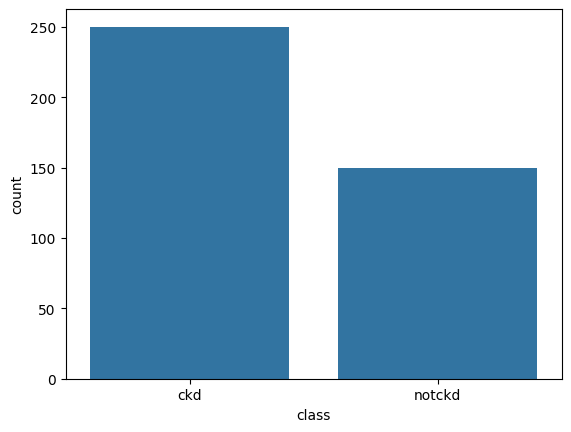

In [18]:
classi = pd.DataFrame(df.groupby('class').size()).idxmax()[0]
df['class'] = df['class'].fillna(classi)
sns.countplot(data=df,x='class')

In [19]:
df['class'].value_counts()

,count
class,
ckd,250
notckd,150


In our dataset, we have 250 entries with disease and 150 without disease. So, there is good balance in data in 2 outcomes. Thus, no need for oversample/undersample the data to train the model.

### Imputing data with different KNN-Imputaion and Mean Imputation


In [20]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import KNNImputer


In [21]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [22]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [23]:
df.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


In [24]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [25]:
cleanup = {"rbc":     {"normal": 1, "abnormal": 0},
           "pc": {"normal": 1, "abnormal": 0},
           "pcc": {"present": 1, "notpresent": 0},
           "ba": {"present": 1, "notpresent": 0},
           "htn": {"yes": 1, "no": 0},
           "dm": {"yes": 1, "no": 0},
           "cad": {"yes": 1, "no": 0},
           "appet": {"good": 1, "poor": 0},
           "pe": {"yes": 1, "no": 0},
           "ane": {"yes": 1, "no": 0},
           "class": {"ckd": 1, "notckd": 0}}

In [26]:
df.replace(cleanup, inplace = True)

In [27]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [28]:
def knnImputerDatasetGenerator(df, neighbors):

    imputer_uniform = KNNImputer(n_neighbors=neighbors, weights = 'uniform')
    dataset_uniform = imputer_uniform.fit_transform(df)

    return pd.DataFrame(dataset_uniform, columns = df.columns)

In [29]:
df_knn_imputed_uniform_3 = knnImputerDatasetGenerator(df, 3)
df_knn_imputed_uniform_5 = knnImputerDatasetGenerator(df, 5)
df_knn_imputed_uniform_7 = knnImputerDatasetGenerator(df, 7)
df_knn_imputed_uniform_9 = knnImputerDatasetGenerator(df, 9)
df_knn_imputed_uniform_11 = knnImputerDatasetGenerator(df, 11)
df_mean_imputed = df.fillna(df.mean())

In [30]:
df_mean_imputed.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

All the NaN/missing value gets Imputed with 5 types of KNN-Imputated values and 1 mean value

In [31]:
df_knn_imputed_uniform_3.to_csv("df_knn_imputed_uniform_3.csv")
df_knn_imputed_uniform_5.to_csv("df_knn_imputed_uniform_5.csv")
df_knn_imputed_uniform_7.to_csv("df_knn_imputed_uniform_7.csv")
df_knn_imputed_uniform_9.to_csv("df_knn_imputed_uniform_9.csv")
df_knn_imputed_uniform_11.to_csv("df_knn_imputed_uniform_11.csv")
df_mean_imputed.to_csv("df_mean_imputed.csv")

Here we generate 6 different imputed datasets, which will be helful for the next prediction process

### Feature Selection

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import *

from matplotlib.pylab import rcParams
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
df_knn_imputed_uniform_3.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

Using heatmap we can Correlates between different predictors for KNN-3 Imputed datasets.

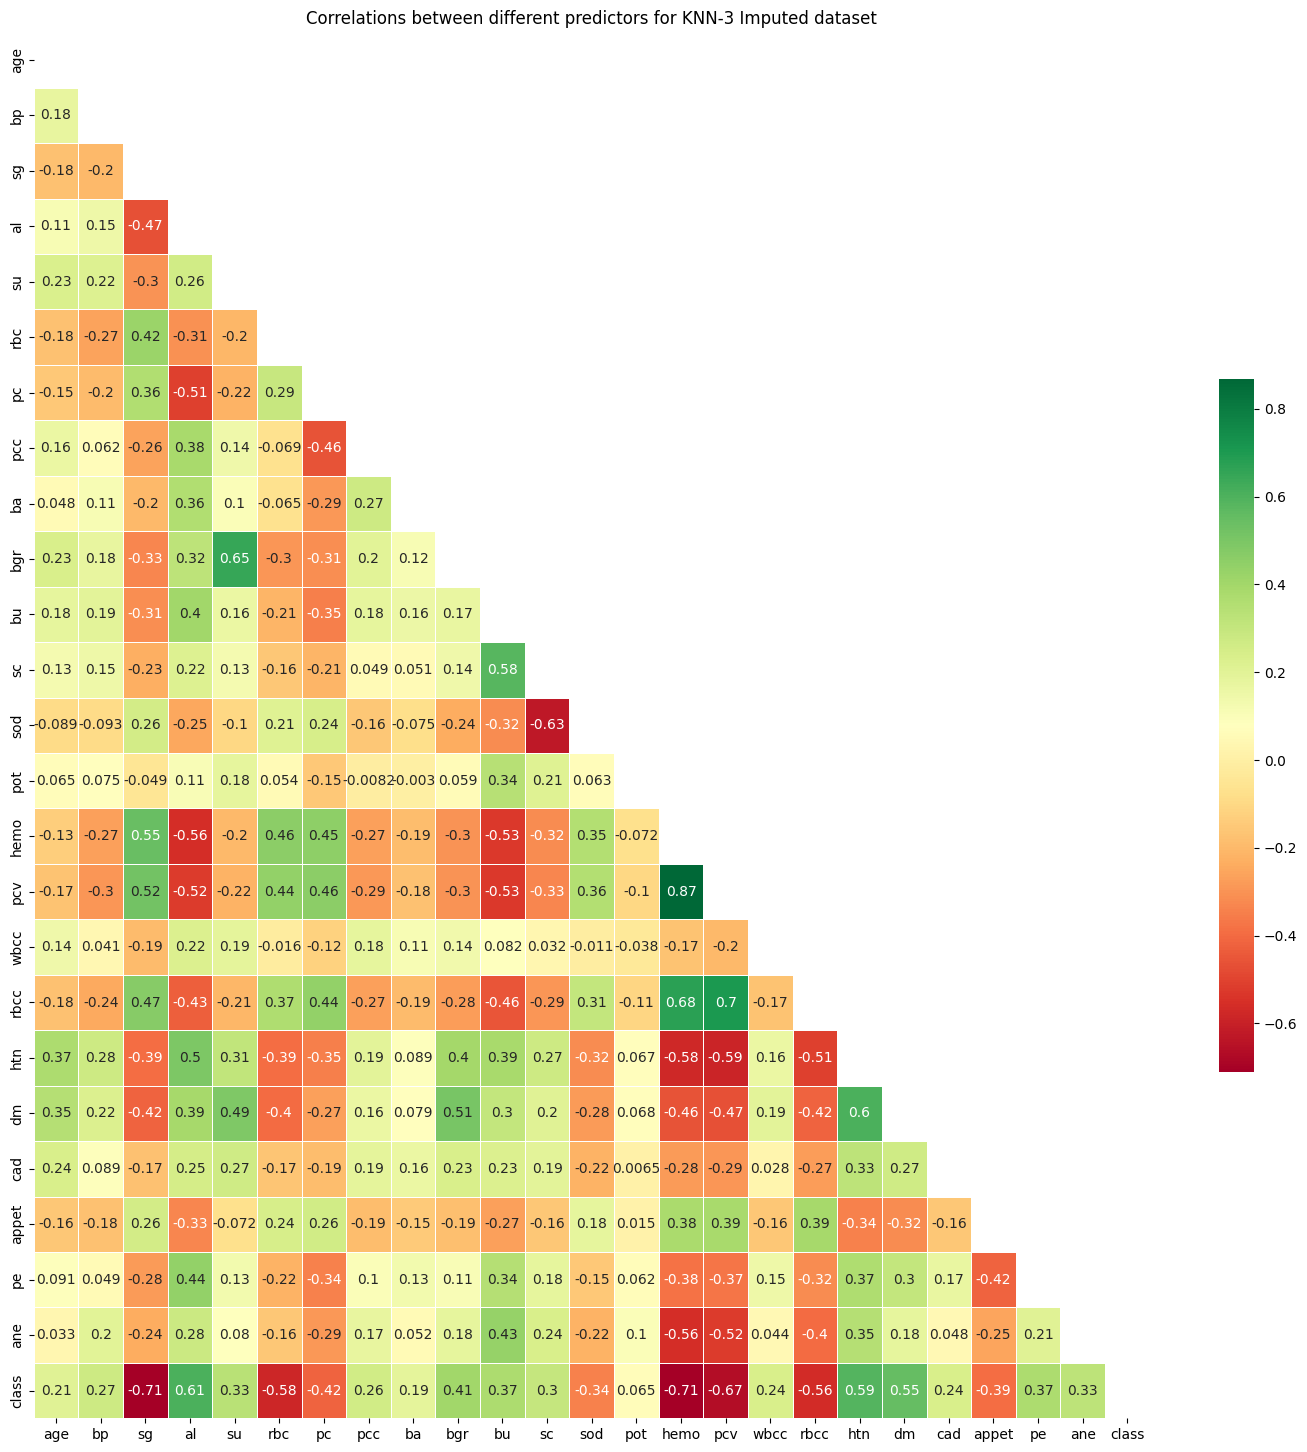

In [34]:
corr_df = df_knn_imputed_uniform_3.corr()
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(corr_df, mask=mask,annot = True, linewidths=.5, cmap = 'RdYlGn',cbar_kws={"shrink": .5});
#  vmax=.3, center=0,square=True,
plt.title('Correlations between different predictors for KNN-3 Imputed dataset')
plt.show()


In [35]:
def contributor(x):
    if(x==0):
        dataset = df_knn_imputed_uniform_3
    elif(x==1):
        dataset = df_knn_imputed_uniform_5
    elif(x==2):
        dataset = df_knn_imputed_uniform_7
    elif(x==3):
        dataset = df_knn_imputed_uniform_9
    elif(x==4):
        dataset = df_knn_imputed_uniform_11
    else:
        dataset = df_mean_imputed

    df_train,df_test = train_test_split(dataset,train_size=0.75)
    x_train=df_train.iloc[:,:24]
    y_train=df_train['class']
    scaler.fit(x_train)
    x_train_sc = scaler.transform(x_train)
    x_test=df_test.iloc[:,:24]
    y_test=df_test['class']
    scaler.fit(x_test)
    x_test_sc=scaler.transform(x_test)

    rfc = RandomForestClassifier(n_estimators=100,random_state=0)
    rfc.fit(x_train, y_train)

    feature_list = list(x_train.columns)
    importances = list(rfc.feature_importances_)
    feature_importances = [(x_train, round(importance, 2)) for x_train, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    print('\n\n')

In [36]:
for i in range(6):
    print(i, "---------------------------")
    contributor(i)


0 ---------------------------
Variable: hemo                 Importance: 0.16
Variable: sg                   Importance: 0.14
Variable: al                   Importance: 0.12
Variable: pcv                  Importance: 0.12
Variable: sc                   Importance: 0.11
Variable: rbc                  Importance: 0.06
Variable: rbcc                 Importance: 0.05
Variable: htn                  Importance: 0.05
Variable: dm                   Importance: 0.04
Variable: bgr                  Importance: 0.03
Variable: bu                   Importance: 0.03
Variable: bp                   Importance: 0.02
Variable: sod                  Importance: 0.02
Variable: pe                   Importance: 0.02
Variable: age                  Importance: 0.01
Variable: pc                   Importance: 0.01
Variable: pot                  Importance: 0.01
Variable: wbcc                 Importance: 0.01
Variable: appet                Importance: 0.01
Variable: su                   Importance: 0.0
Variable: p

We Can see the variable which has importance >0.01 from all the Imputed datasets are same. So,Now we should drop all the less Important variable which is 0.01 or less (age,su,pc,sod,pot,wbcc,pcc,ba,cad,ane)

In [37]:
def drop_column(x):
    res={}
    if(x==0):
        dataset = df_knn_imputed_uniform_3
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane'],axis=1,inplace=True)
    elif(x==1):
        dataset = df_knn_imputed_uniform_5
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane','pot' ,'appet'],axis=1,inplace=True)
    elif(x==2):
        dataset = df_knn_imputed_uniform_7
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane','pot'],axis=1,inplace=True)
    elif(x==3):
        dataset = df_knn_imputed_uniform_9
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane'],axis=1,inplace=True)
    elif(x==4):
        dataset = df_knn_imputed_uniform_11
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane','appet'],axis=1,inplace=True)
    else:
        dataset = df_mean_imputed
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane','pot','pe'],axis=1,inplace=True)

In [38]:
for i in range(6):
    drop_column(i)

In [39]:
df_knn_imputed_uniform_3.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'pe',
       'class'],
      dtype='object')

In [40]:
df_knn_imputed_uniform_5.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'pe', 'class'],
      dtype='object')

In [41]:
df_knn_imputed_uniform_7.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'pe', 'class'],
      dtype='object')

In [42]:
df_knn_imputed_uniform_9.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'pe',
       'class'],
      dtype='object')

In [43]:
df_knn_imputed_uniform_11.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'pe', 'class'],
      dtype='object')

In [44]:
df_mean_imputed.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'class'],
      dtype='object')

In [45]:
df_knn_imputed_uniform_3.to_csv("df_knn_imputed_uniform_3.csv",index=False)
df_knn_imputed_uniform_5.to_csv("df_knn_imputed_uniform_5.csv",index=False)
df_knn_imputed_uniform_7.to_csv("df_knn_imputed_uniform_7.csv",index=False)
df_knn_imputed_uniform_9.to_csv("df_knn_imputed_uniform_9.csv",index=False)
df_knn_imputed_uniform_11.to_csv("df_knn_imputed_uniform_11.csv",index=False)
df_mean_imputed.to_csv("df_mean_imputed.csv",index=False)

### Model Training

In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pickle
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Applying all the models(LOG, RF, SVCand combined model of LOG & RF).

In [47]:
dfs = [df_knn_imputed_uniform_3,df_knn_imputed_uniform_5,
        df_knn_imputed_uniform_7,df_knn_imputed_uniform_9,
        df_knn_imputed_uniform_11,df_mean_imputed]

dfs_name = ["knn_imputed_3", "knn_imputed_5",
                "knn_imputed_7","knn_imputed_9",
                "knn_imputed_11","mean_imputed"]

In [48]:
x = df.iloc[:, :-1]
y = df['class']
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, shuffle=True, random_state=0
)
print(x_train.columns)
# print(x_test.columns)
print(y_train.head(5))
# print(y_test.head(5))

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')
250    0
63     1
312    0
159    1
283    0
Name: class, dtype: int64


In [49]:
import joblib

### **Logistic regression**

In [50]:
lr_classifier = LogisticRegression(
    penalty='l2',
    C=1.0,
    max_iter=1000,
    random_state=42,
)

def log():
    logistic = {}

    for i, df in enumerate(dfs):
        # Split features (X) and target (y)
        x = df.iloc[:, :-1]
        y = df['class']

        # Train-test split
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.25, shuffle=True, random_state=0
        )

        # Standardize features
        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)

        # Train the logistic regression model
        lr_classifier.fit(x_train, y_train)

        # Predictions
        test_pred = lr_classifier.predict(x_test)
        train_pred = lr_classifier.predict(x_train)

        # Metrics for test set
        train_acc = round(accuracy_score(y_train, train_pred), 7)
        test_acc = round(accuracy_score(y_test, test_pred), 7)
        test_precision = round(precision_score(y_test, test_pred, average='weighted'), 7)
        test_recall = round(recall_score(y_test, test_pred, average='weighted'), 7)
        test_f1 = round(f1_score(y_test, test_pred, average='weighted'), 7)

        # Confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

        # Store results
        logistic[dfs_name[i]] = [
            train_acc, test_acc, test_precision, test_recall, test_f1, tn, fp, fn, tp
        ]

        if i == 5:
            # Save the trained model and the scaler
            model_filename = "lr_classifier.pkl"
            joblib.dump(lr_classifier, model_filename)
            scaler_filename = "scaler_lr.pkl"
            joblib.dump(ss, scaler_filename)
            print(f"Model saved as {model_filename} of {dfs_name[i]}")

    return logistic

In [51]:
# Create a DataFrame from the metrics dictionary
result_df = pd.DataFrame.from_dict(
    data=log(),
    orient='index',
    columns=[
        'train_acc', 'test_acc', 'test_precision', 'test_recall', 'test_f1',
        'true_neg', 'false_pos', 'false_neg', 'true_pos'
    ]
)

# Display the result DataFrame
print(result_df)


Model saved as lr_classifier.pkl of mean_imputed
                train_acc  test_acc  test_precision  test_recall   test_f1  \
knn_imputed_3    0.996667      0.98        0.980625         0.98  0.979889   
knn_imputed_5    0.996667      0.97        0.971385         0.97  0.969738   
knn_imputed_7    1.000000      0.98        0.980625         0.98  0.979889   
knn_imputed_9    1.000000      0.97        0.971385         0.97  0.969738   
knn_imputed_11   0.996667      0.97        0.971385         0.97  0.969738   
mean_imputed     1.000000      0.99        0.990256         0.99  0.990024   

                true_neg  false_pos  false_neg  true_pos  
knn_imputed_3         36          2          0        62  
knn_imputed_5         35          3          0        62  
knn_imputed_7         36          2          0        62  
knn_imputed_9         35          3          0        62  
knn_imputed_11        35          3          0        62  
mean_imputed          38          0          1    

### **Random Forest**

In [52]:
rf_classifier = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
)

def rf():
    rand_forest = {}

    for i, df in enumerate(dfs):
        # Split features (X) and target (y)
        x = df.iloc[:, :-1]
        y = df['class']

        # Train-test split
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.25, shuffle=True, random_state=42
        )

        # Standardize features
        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)

        # Train the Random Forest model
        rf_classifier.fit(x_train, y_train)

        # Predictions
        test_pred = rf_classifier.predict(x_test)
        train_pred = rf_classifier.predict(x_train)

        # Metrics for train set
        train_acc = round(accuracy_score(y_train, train_pred), 7)

        # Metrics for test set
        test_acc = round(accuracy_score(y_test, test_pred), 7)
        test_precision = round(precision_score(y_test, test_pred, average='weighted'), 7)
        test_recall = round(recall_score(y_test, test_pred, average='weighted'), 7)
        test_f1 = round(f1_score(y_test, test_pred, average='weighted'), 7)

        # Confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

        # Store results
        rand_forest[dfs_name[i]] = [
            train_acc, test_acc, test_precision, test_recall, test_f1, tn, fp, fn, tp
        ]

        if(i==5):
          # Save the trained model of best mean_imputed
          model_filename = "rf_classifier.pkl"
          joblib.dump(rf_classifier, model_filename)
          scaler_filename = "scaler_rf.pkl"
          joblib.dump(ss, scaler_filename)
          print(f"Model saved as {model_filename} of {dfs_name[i]}")

    return rand_forest

In [53]:
# Create a DataFrame from the metrics dictionary
result_df = pd.DataFrame.from_dict(
    data=rf(),
    orient='index',
    columns=[
        'train_acc', 'test_acc', 'test_precision', 'test_recall', 'test_f1',
        'true_neg', 'false_pos', 'false_neg', 'true_pos'
    ]
)

# Display the result DataFrame
print(result_df)


Model saved as rf_classifier.pkl of mean_imputed
                train_acc  test_acc  test_precision  test_recall   test_f1  \
knn_imputed_3         1.0      0.98        0.980597         0.98  0.979857   
knn_imputed_5         1.0      0.98        0.980597         0.98  0.979857   
knn_imputed_7         1.0      0.98        0.980597         0.98  0.979857   
knn_imputed_9         1.0      0.98        0.980597         0.98  0.979857   
knn_imputed_11        1.0      0.98        0.980597         0.98  0.979857   
mean_imputed          1.0      1.00        1.000000         1.00  1.000000   

                true_neg  false_pos  false_neg  true_pos  
knn_imputed_3         33          2          0        65  
knn_imputed_5         33          2          0        65  
knn_imputed_7         33          2          0        65  
knn_imputed_9         33          2          0        65  
knn_imputed_11        33          2          0        65  
mean_imputed          35          0          0    

### **SVC**

In [54]:
svc_classifier = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)


def svc():
    svc_result = {}

    for i, df in enumerate(dfs):
        # Split features (X) and target (y)
        x = df.iloc[:, :-1]
        y = df['class']

        # Train-test split
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.25, shuffle=True, random_state=42
        )

        # Standardize features
        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)

        # Train the Random Forest model
        svc_classifier.fit(x_train, y_train)

        # Predictions
        test_pred = svc_classifier.predict(x_test)
        train_pred = svc_classifier.predict(x_train)

        # Metrics for train set
        train_acc = round(accuracy_score(y_train, train_pred), 7)

        # Metrics for test set
        test_acc = round(accuracy_score(y_test, test_pred), 7)
        test_precision = round(precision_score(y_test, test_pred, average='weighted'), 7)
        test_recall = round(recall_score(y_test, test_pred, average='weighted'), 7)
        test_f1 = round(f1_score(y_test, test_pred, average='weighted'), 7)

        # Confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

        # Store results
        svc_result[dfs_name[i]] = [
            train_acc, test_acc, test_precision, test_recall, test_f1, tn, fp, fn, tp
        ]

        if(i==5):
          # Save the trained model of best mean_imputed
          model_filename = "svc_classifier.pkl"
          joblib.dump(svc_classifier, model_filename)
          scaler_filename = "scaler_svc.pkl"
          joblib.dump(ss, scaler_filename)

          print(f"Model saved as {model_filename} of {dfs_name[i]}")

    return svc_result

In [55]:
# Create a DataFrame from the metrics dictionary
result_df = pd.DataFrame.from_dict(
    data=svc(),
    orient='index',
    columns=[
        'train_acc', 'test_acc', 'test_precision', 'test_recall', 'test_f1',
        'true_neg', 'false_pos', 'false_neg', 'true_pos'
    ]
)

# Display the result DataFrame
print(result_df)

Model saved as svc_classifier.pkl of mean_imputed
                train_acc  test_acc  test_precision  test_recall   test_f1  \
knn_imputed_3    0.990000      0.99        0.990151         0.99  0.989966   
knn_imputed_5    0.993333      0.99        0.990151         0.99  0.989966   
knn_imputed_7    0.996667      0.98        0.980597         0.98  0.979857   
knn_imputed_9    0.996667      0.98        0.980597         0.98  0.979857   
knn_imputed_11   0.993333      0.98        0.980597         0.98  0.979857   
mean_imputed     0.996667      1.00        1.000000         1.00  1.000000   

                true_neg  false_pos  false_neg  true_pos  
knn_imputed_3         34          1          0        65  
knn_imputed_5         34          1          0        65  
knn_imputed_7         33          2          0        65  
knn_imputed_9         33          2          0        65  
knn_imputed_11        33          2          0        65  
mean_imputed          35          0          0   

### **Combined Model of Logistic Regression & Random Forest**

In [56]:
from sklearn.ensemble import VotingClassifier

def combined():
    # Initialize Voting Classifier with parameters
    estimators = [('lr', lr_classifier), ('rf', rf_classifier)]
    majority_voting = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)

    combined_results = {}

    # Iterate over datasets
    for i, df in enumerate(dfs):
        x = df.iloc[:, :-1]
        y = df['class']

        # Split data
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.25, random_state=42
        )

        # Standardize features
        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)

        # Train VotingClassifier
        majority_voting.fit(x_train, y_train)

        # Predictions
        test_pred = majority_voting.predict(x_test)
        train_pred = majority_voting.predict(x_train)

        # Metrics
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        precision = precision_score(y_test, test_pred, average='weighted')
        recall = recall_score(y_test, test_pred, average='weighted')
        f1 = f1_score(y_test, test_pred, average='weighted')

        tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

        # Store results
        combined_results[dfs_name[i]] = [
            train_acc, test_acc, precision, recall, f1, tn, fp, fn, tp
        ]

        if(i==5):
          # Save the trained model of best mean_imputed
          model_filename = "majority_voting_lr_rf.pkl"
          joblib.dump(majority_voting, model_filename)
          scaler_filename = "scaler_lr_rf.pkl"
          joblib.dump(ss, scaler_filename)

          print(f"Model saved as {model_filename} of {dfs_name[i]}")


    # Return results as a DataFrame
    return combined_results

In [57]:
# Create a DataFrame from the metrics dictionary
result_df = pd.DataFrame.from_dict(
    data=combined(),
    orient='index',
    columns=[
        'train_acc', 'test_acc', 'test_precision', 'test_recall', 'test_f1',
        'true_neg', 'false_pos', 'false_neg', 'true_pos'
    ]
)

print(result_df)

Model saved as majority_voting_lr_rf.pkl of mean_imputed
                train_acc  test_acc  test_precision  test_recall   test_f1  \
knn_imputed_3    0.996667      1.00        1.000000         1.00  1.000000   
knn_imputed_5    0.996667      0.98        0.980597         0.98  0.979857   
knn_imputed_7    1.000000      0.99        0.990152         0.99  0.989966   
knn_imputed_9    1.000000      0.98        0.980597         0.98  0.979857   
knn_imputed_11   0.996667      0.98        0.980597         0.98  0.979857   
mean_imputed     0.996667      1.00        1.000000         1.00  1.000000   

                true_neg  false_pos  false_neg  true_pos  
knn_imputed_3         35          0          0        65  
knn_imputed_5         33          2          0        65  
knn_imputed_7         34          1          0        65  
knn_imputed_9         33          2          0        65  
knn_imputed_11        33          2          0        65  
mean_imputed          35          0       